In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Veri setini yükle (virgülle ayrılmış)
data = pd.read_csv("coc81.csv", delimiter=",")
print(data.head())

# Kategorik sütunları dönüştür (dev_mode)
encoder = OneHotEncoder(sparse_output=False)  # Yeni sklearn sürümü için
dev_mode_encoded = encoder.fit_transform(data[['?dev_mode']])

# Dönüştürülmüş kategorik verileri birleştir
encoded_columns = encoder.get_feature_names_out(input_features=['?dev_mode'])
data_encoded = pd.DataFrame(dev_mode_encoded, columns=encoded_columns)
data = pd.concat([data, data_encoded], axis=1)

# Gereksiz sütunları çıkar
data.drop(['?$project_id', '?dev_mode'], axis=1, inplace=True)

# Özellikleri ve hedef değişkeni ayır
features = data.drop(['$<actual'], axis=1)
target = data['$<actual']

# Ölçekleme
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Veri ayırma
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)


   ?$project_id     ?dev_mode  $rely  $data  $cplx  $time  $stor  $virt  \
0             1      embedded   0.88   1.16   0.70    1.0   1.06   1.15   
1             2      embedded   0.88   1.16   0.85    1.0   1.06   1.00   
2             3  semidetached   1.00   1.16   0.85    1.0   1.00   0.87   
3             4       organic   0.75   1.16   0.70    1.0   1.00   0.87   
4             5       organic   0.88   0.94   1.00    1.0   1.00   0.87   

   $turn  $acap  $aexp  $pcap  $vexp  $lexp  $modp  $tool  $sced   $loc  \
0   1.07   1.19   1.13   1.17    1.1   1.00   1.24   1.10   1.04  113.0   
1   1.07   1.00   0.91   1.00    0.9   0.95   1.10   1.00   1.00  293.0   
2   0.94   0.86   0.82   0.86    0.9   0.95   0.91   0.91   1.00  132.0   
3   1.00   1.19   0.91   1.42    1.0   0.95   1.24   1.00   1.04   60.0   
4   1.00   1.00   1.00   0.86    0.9   0.95   1.24   1.00   1.00   16.0   

   $<actual  
0    2040.0  
1    1600.0  
2     243.0  
3     240.0  
4      33.0  
Eğitim verisi 

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Model tanımı
model = Sequential([
    Dense(32, activation='relu', input_shape=(features_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Çıkış katmanı
])

# Model derleme
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model özeti
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from sklearn.model_selection import train_test_split

# Veri ayırma
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Modeli eğit
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 6260755.0000 - mae: 965.9036 - val_loss: 413343.6875 - val_mae: 322.9498
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6269072.5000 - mae: 968.4551 - val_loss: 413266.0625 - val_mae: 322.8287
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5659157.0000 - mae: 853.6739 - val_loss: 413183.9375 - val_mae: 322.7097
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2940597.2500 - mae: 618.6486 - val_loss: 413091.6250 - val_mae: 322.5910
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3182897.2500 - mae: 639.3986 - val_loss: 413008.6562 - val_mae: 322.4819
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3968684.2500 - mae: 701.3978 - val_loss: 412932.3438 - val_mae: 322.3780
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3153471.0000 - mae: 623.4591 - val_loss: 412861.5312 - val_mae: 322.2770
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5579446.0000 - mae: 813.6

In [9]:
# Performans değerlendirme
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 328312.6250 - mae: 280.6762
Test Loss: 328312.625, Test MAE: 280.6762390136719


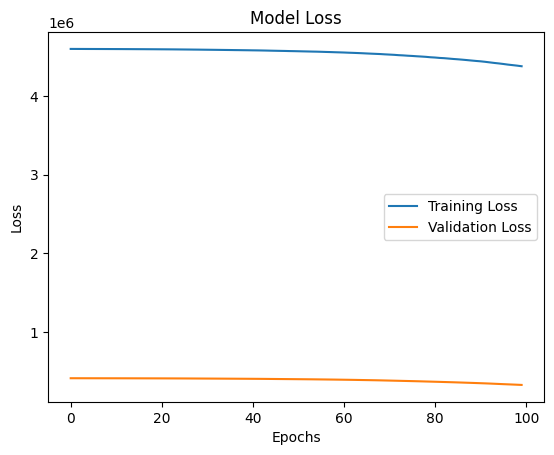

In [10]:
import matplotlib.pyplot as plt

# Kayıp eğrisi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


Veri kümesi sütun adları: Index(['?$project_id', '?dev_mode', '$rely', '$data', '$cplx', '$time',
       '$stor', '$virt', '$turn', '$acap', '$aexp', '$pcap', '$vexp', '$lexp',
       '$modp', '$tool', '$sced', '$loc', '$<actual'],
      dtype='object')
Hedef sütun adı: $<actual


<Axes: xlabel='$<actual', ylabel='Count'>

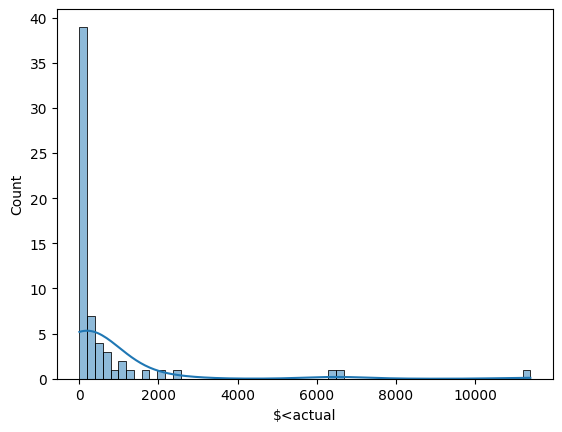

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip()  # Sütun adlarını temizle

# Sütun adlarını kontrol et
print("Veri kümesi sütun adları:", data.columns)

# Kategorik sütunları dönüştür (dev_mode)
encoder = OneHotEncoder(sparse_output=False)
dev_mode_encoded = encoder.fit_transform(data[['?dev_mode']])

# Dönüştürülmüş kategorik verileri birleştir
encoded_columns = encoder.get_feature_names_out(['?dev_mode'])
data_encoded = pd.DataFrame(dev_mode_encoded, columns=encoded_columns)
data = pd.concat([data, data_encoded], axis=1)

# Gereksiz sütunları çıkar
data.drop(['?$project_id', '?dev_mode'], axis=1, inplace=True)

# Hedef değişkeni kontrol et
target_column = data.columns[data.columns.str.contains("actual", case=False)][0]
print("Hedef sütun adı:", target_column)
import seaborn as sns
sns.histplot(data[target_column], kde=True)



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 34.4318 - mae: 5.5811 - val_loss: 22.8497 - val_mae: 4.5195
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 28.8089 - mae: 5.0439 - val_loss: 21.7397 - val_mae: 4.4035
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 26.4065 - mae: 4.7643 - val_loss: 20.6955 - val_mae: 4.2910
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 22.0792 - mae: 4.2696 - val_loss: 19.7243 - val_mae: 4.1834
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 19.8686 - mae: 4.0507 - val_loss: 18.8442 - val_mae: 4.0833
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.8940 - mae: 3.5726 - val_loss: 17.9710 - val_mae: 3.9822
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.7093 - mae: 3.3230 - val_loss: 17.1255 - val_mae: 3.8825
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.9577 - mae: 3.1815 - val_loss: 16.2952 - val_mae: 3.7818
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.4054 -

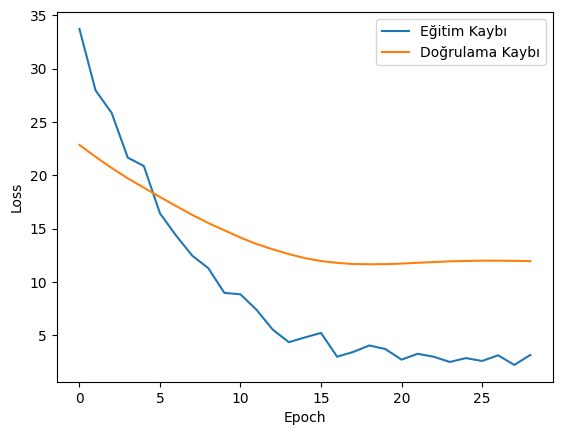

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Ortalama Mutlak Hata (MAE): 318.9586255733784
Model başarıyla eğitildi ve kaydedildi!


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip()  # Sütun adlarını temizle

# Sütun adlarını kontrol et
print("Veri kümesi sütun adları:", data.columns)

# Kategorik sütunları dönüştür (dev_mode)
encoder = OneHotEncoder(sparse_output=False)
dev_mode_encoded = encoder.fit_transform(data[['?dev_mode']])

# Dönüştürülmüş kategorik verileri birleştir
encoded_columns = encoder.get_feature_names_out(['?dev_mode'])
data_encoded = pd.DataFrame(dev_mode_encoded, columns=encoded_columns)
data = pd.concat([data, data_encoded], axis=1)

# Gereksiz sütunları çıkar
data.drop(['?$project_id', '?dev_mode'], axis=1, inplace=True)

# Hedef değişkeni kontrol et
target_column = data.columns[data.columns.str.contains("actual", case=False)][0]
print("Hedef sütun adı:", target_column)
import seaborn as sns
sns.histplot(data[target_column], kde=True)


# Hedef değişkeni logaritmik dönüşümle normalize et
data[target_column] = np.log1p(data[target_column])

# Özellikleri ve hedef değişkeni ayır
features = data.drop([target_column], axis=1)
target = data[target_column]

# Ölçekleme
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Veri ayırma
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Model derleme

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


# Modeli eğitme
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Performansı görselleştirme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Modelin doğruluğunu değerlendirme
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = predictions.flatten()  # Tahmin sonuçlarını tek boyutlu hale getir
    predictions = np.expm1(predictions)  # Logaritmik dönüşümü geri çevir
    y_test = np.expm1(y_test.to_numpy())  # Logaritmik dönüşümü geri çevir ve NumPy dizisine çevir
    mae = np.mean(np.abs(predictions - y_test))
    print(f"Ortalama Mutlak Hata (MAE): {mae}")

evaluate_model(model, X_test, y_test)

# Modeli kaydetme
model.save("cocomo_effort_estimation_model.h5")

print("Model başarıyla eğitildi ve kaydedildi!")

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)


# Sütun adlarını kontrol et
print("Veri kümesi sütun adları:", data.columns)
# Veri setinin ilk 5 satırını görüntüle
print(data.head())

# Veri setinin genel istatistiksel bilgilerini görüntüle
print(data.describe())

# Veri tiplerini kontrol et
print(data.dtypes)

# Kategorik sütunları bulma
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kategorik Sütunlar:", categorical_columns)

# Sayısal sütunları bulma
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Sayısal Sütunlar:", numerical_columns)


Veri kümesi sütun adları: Index(['project_id', 'dev_mode', 'rely', 'data', 'cplx', 'time', 'stor',
       'virt', 'turn', 'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool',
       'sced', 'loc', '<actual'],
      dtype='object')
   project_id      dev_mode  rely  data  cplx  time  stor  virt  turn  acap  \
0           1      embedded  0.88  1.16  0.70   1.0  1.06  1.15  1.07  1.19   
1           2      embedded  0.88  1.16  0.85   1.0  1.06  1.00  1.07  1.00   
2           3  semidetached  1.00  1.16  0.85   1.0  1.00  0.87  0.94  0.86   
3           4       organic  0.75  1.16  0.70   1.0  1.00  0.87  1.00  1.19   
4           5       organic  0.88  0.94  1.00   1.0  1.00  0.87  1.00  1.00   

   aexp  pcap  vexp  lexp  modp  tool  sced    loc  <actual  
0  1.13  1.17   1.1  1.00  1.24  1.10  1.04  113.0   2040.0  
1  0.91  1.00   0.9  0.95  1.10  1.00  1.00  293.0   1600.0  
2  0.82  0.86   0.9  0.95  0.91  0.91  1.00  132.0    243.0  
3  0.91  1.42   1.0  0.95  1.24  1.00  1.04

       project_id       rely       data       cplx       time      stor  \
count   63.000000  63.000000  63.000000  63.000000  63.000000  63.00000   
mean    32.000000   1.036349   1.004444   1.092063   1.113810   1.14381   
std     18.330303   0.193477   0.073830   0.201728   0.161639   0.17942   
min      1.000000   0.750000   0.940000   0.700000   1.000000   1.00000   
25%     16.500000   0.880000   0.940000   1.000000   1.000000   1.00000   
50%     32.000000   1.000000   1.000000   1.070000   1.060000   1.06000   
75%     47.500000   1.150000   1.040000   1.300000   1.110000   1.21000   
max     63.000000   1.400000   1.160000   1.650000   1.660000   1.56000   

            virt       turn       acap       aexp      pcap       vexp  \
count  63.000000  63.000000  63.000000  63.000000  63.00000  63.000000   
mean    1.008413   0.971746   0.905238   0.948571   0.93746   1.005238   
std     0.120593   0.080973   0.151507   0.119243   0.16651   0.093375   
min     0.870000   0.870000 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1.5515 - val_loss: 0.0025
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7465 - val_loss: 0.0020
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6844 - val_loss: 0.0021
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9023 - val_loss: 0.0018
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6482 - val_loss: 0.0016
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7108 - val_loss: 0.0016
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5089 - val_loss: 0.0022
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6626 - val_loss: 0.0033
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3298 - val_loss: 0.0043
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6884 - val_loss: 0.0050
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4188 - val_loss: 0.0053
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5025 - val_loss: 0.0051
E

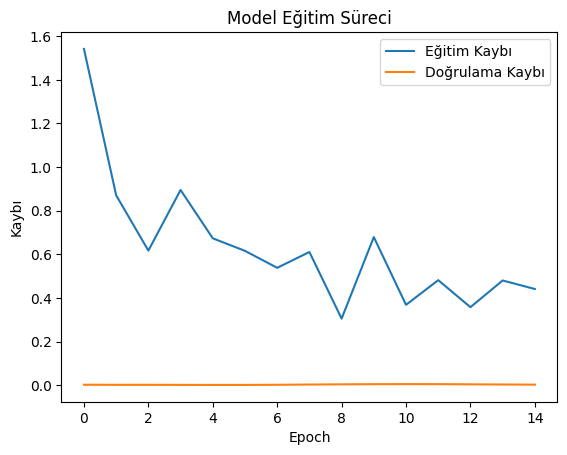

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Test verisi MMRE: 95.30516609635174


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)

# Veri setinin genel istatistiksel bilgilerini görüntüle
print(data.describe())

# Kategorik sütunları bulma
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kategorik Sütunlar:", categorical_columns)

# Sayısal sütunları bulma
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Sayısal Sütunlar:", numerical_columns)

# Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
from sklearn.preprocessing import OneHotEncoder

# Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False)
dev_mode_encoded = encoder.fit_transform(data[['dev_mode']])

# Dönüştürülmüş verileri DataFrame olarak ekleyelim
dev_mode_encoded_df = pd.DataFrame(dev_mode_encoded, columns=encoder.get_feature_names_out(['dev_mode']))
data = pd.concat([data, dev_mode_encoded_df], axis=1)
data.drop('dev_mode', axis=1, inplace=True)

# Sayısal veriler üzerinde ölçekleme (Min-Max Scaler)
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)

# Ölçeklenmiş verilerle tamamlanan veri kümesi
data_scaled = pd.concat([scaled_data, dev_mode_encoded_df], axis=1)

# Özellikleri ve hedef değişkeni ayırma
X = data_scaled.drop('<actual', axis=1)
y = data_scaled['<actual']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Yapay Sinir Ağı Modeli
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(63, activation='relu'),
    Dense(1, activation='linear')  # Sürekli değer tahmini için lineer aktivasyon
])

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Erken durdurma (EarlyStopping) callback'ini ekleyelim
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Eğitim sürecinin görselleştirilmesi
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Eğitim Süreci')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

# Test verisi ile tahmin yapma
y_pred = model.predict(X_test)

# MMRE Hesaplama
mmre = np.mean(np.abs((y_test - y_pred.flatten()) / y_test))
print("Test verisi MMRE:", mmre)


   project_id      dev_mode  rely  data  cplx  time  stor  virt  turn  acap  \
0           1      embedded  0.88  1.16  0.70   1.0  1.06  1.15  1.07  1.19   
1           2      embedded  0.88  1.16  0.85   1.0  1.06  1.00  1.07  1.00   
2           3  semidetached  1.00  1.16  0.85   1.0  1.00  0.87  0.94  0.86   
3           4       organic  0.75  1.16  0.70   1.0  1.00  0.87  1.00  1.19   
4           5       organic  0.88  0.94  1.00   1.0  1.00  0.87  1.00  1.00   

   aexp  pcap  vexp  lexp  modp  tool  sced    loc  <actual  
0  1.13  1.17   1.1  1.00  1.24  1.10  1.04  113.0   2040.0  
1  0.91  1.00   0.9  0.95  1.10  1.00  1.00  293.0   1600.0  
2  0.82  0.86   0.9  0.95  0.91  0.91  1.00  132.0    243.0  
3  0.91  1.42   1.0  0.95  1.24  1.00  1.04   60.0    240.0  
4  1.00  0.86   0.9  0.95  1.24  1.00  1.00   16.0     33.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ----

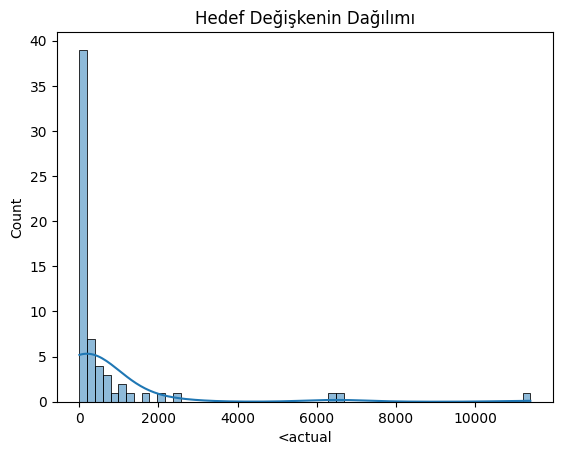

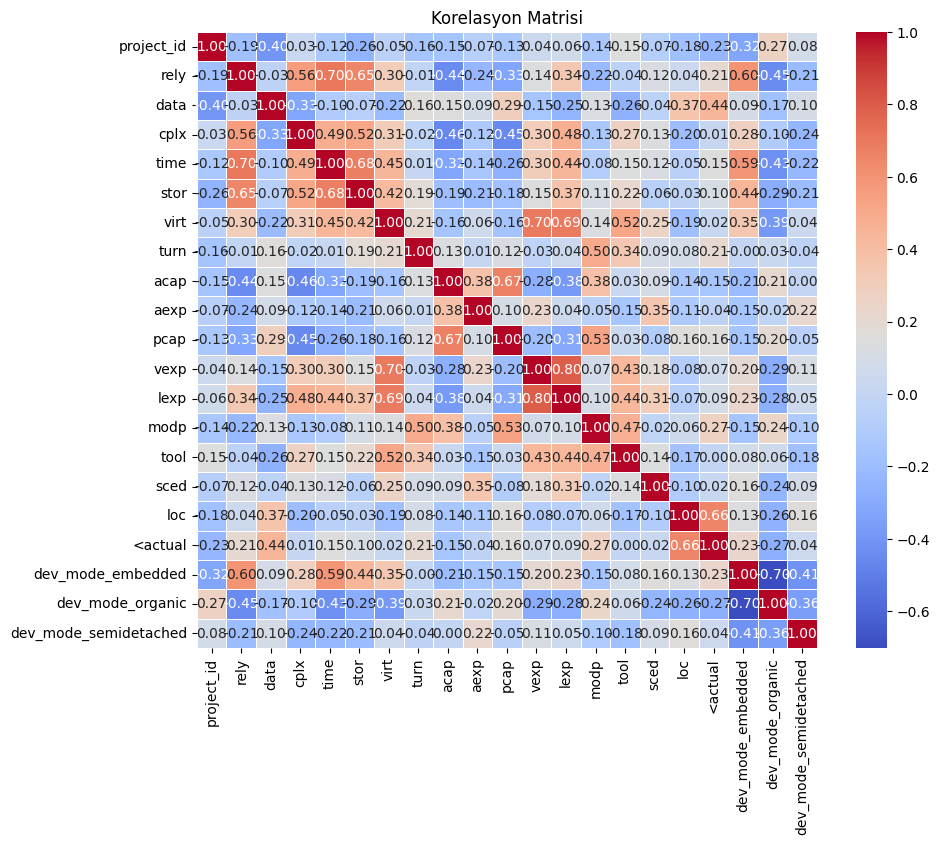

<actual                  1.000000
loc                      0.657198
data                     0.444551
modp                     0.269879
dev_mode_embedded        0.232291
rely                     0.206703
turn                     0.205883
pcap                     0.156916
time                     0.152485
stor                     0.104838
lexp                     0.087766
vexp                     0.068105
dev_mode_semidetached    0.042284
sced                     0.021463
virt                     0.018668
cplx                     0.010049
tool                     0.002223
aexp                    -0.035519
acap                    -0.147865
project_id              -0.231131
dev_mode_organic        -0.270744
Name: <actual, dtype: float64


In [35]:
import pandas as pd

# Veriyi yükleme
data = pd.read_csv('coc81.csv')
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)
# İlk birkaç satırı görüntüleme
print(data.head())

# Veri hakkında genel bilgi (tip, boş değerler, veri türleri vb.)
print(data.info())

# İstatistiksel özet
print(data.describe())

# Eksik verileri kontrol etme
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])


# Kategorik sütunları tespit etme
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

# Kategorik verilerin sayısal verilere dönüştürülmesi (One-Hot Encoding)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
for column in categorical_columns:
    encoded_column = encoder.fit_transform(data[[column]])
    encoded_df = pd.DataFrame(encoded_column, columns=encoder.get_feature_names_out([column]))
    data = pd.concat([data, encoded_df], axis=1).drop(column, axis=1)

# Yeni veri setini gözden geçirme
print(data.head())


# Hedef değişkenin dağılımını inceleme
import matplotlib.pyplot as plt
import seaborn as sns

# Hedef değişkenin adı örneğin 'target' ise
sns.histplot(data['<actual'], kde=True)
plt.title('Hedef Değişkenin Dağılımı')
plt.show()


# Korelasyon matrisini hesaplama
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

# Hedef değişkenle olan korelasyonu gösterme (örneğin, 'target')
target_correlation = correlation_matrix['<target'].sort_values(ascending=False)
print(target_correlation)


            rely       data       cplx       time      stor       virt  \
count  63.000000  63.000000  63.000000  63.000000  63.00000  63.000000   
mean    1.036349   1.004444   1.092063   1.113810   1.14381   1.008413   
std     0.193477   0.073830   0.201728   0.161639   0.17942   0.120593   
min     0.750000   0.940000   0.700000   1.000000   1.00000   0.870000   
25%     0.880000   0.940000   1.000000   1.000000   1.00000   0.870000   
50%     1.000000   1.000000   1.070000   1.060000   1.06000   1.000000   
75%     1.150000   1.040000   1.300000   1.110000   1.21000   1.150000   
max     1.400000   1.160000   1.650000   1.660000   1.56000   1.300000   

            turn       acap       aexp      pcap       vexp       lexp  \
count  63.000000  63.000000  63.000000  63.00000  63.000000  63.000000   
mean    0.971746   0.905238   0.948571   0.93746   1.005238   1.001429   
std     0.080973   0.151507   0.119243   0.16651   0.093375   0.051988   
min     0.870000   0.710000   0.82000

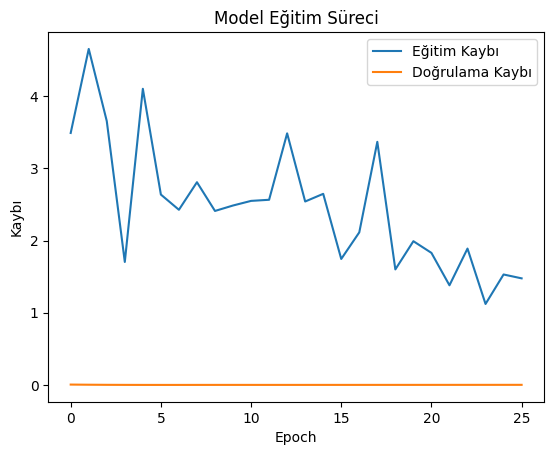

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Test verisi MMRE: 72.57405439160047


['model1.pkl']

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)
# project_id sütununu düşür
if 'project_id' in data.columns:
    data.drop('project_id', axis=1, inplace=True)
else:
    print("project_id sütunu veri setinde bulunamadı.")
# Veri setinin genel istatistiksel bilgilerini görüntüle
print(data.describe())

# Kategorik sütunları bulma
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kategorik Sütunlar:", categorical_columns)

# Sayısal sütunları bulma
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Sayısal Sütunlar:", numerical_columns)

# Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False)
dev_mode_encoded = encoder.fit_transform(data[['dev_mode']])

# Dönüştürülmüş verileri DataFrame olarak ekleyelim
dev_mode_encoded_df = pd.DataFrame(dev_mode_encoded, columns=encoder.get_feature_names_out(['dev_mode']))
data = pd.concat([data, dev_mode_encoded_df], axis=1)
data.drop('dev_mode', axis=1, inplace=True)

# Sayısal veriler üzerinde ölçekleme (Min-Max Scaler)
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)

# Ölçeklenmiş verilerle tamamlanan veri kümesi
data_scaled = pd.concat([scaled_data, dev_mode_encoded_df], axis=1)

# Özellikleri ve hedef değişkeni ayırma
X = data_scaled.drop('<actual', axis=1)
y = data_scaled['<actual']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Yapay Sinir Ağı Modeli (Optimizasyonlar)
model = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')  # Sürekli değer tahmini için lineer aktivasyon
])

# Modeli derleme (LR optimizasyonu ile)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

# Erken durdurma (EarlyStopping) callback'ini ekleyelim
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Eğitim sürecinin görselleştirilmesi
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Eğitim Süreci')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

# Test verisi ile tahmin yapma
y_pred = model.predict(X_test)

# MMRE Hesaplama
mmre = np.mean(np.abs((y_test - y_pred.flatten()) / y_test))
print("Test verisi MMRE:", mmre)
# Modeli kaydetme
joblib.dump(svr_model, 'model1.pkl')

In [45]:
# Modeli yükleme
from tensorflow.keras.models import load_model

model = load_model('model.h5')

# Tüm modeller

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# 1. Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)

# 2. Veri setinin genel istatistiksel bilgilerini görüntüle
print(data.describe())

# 3. Kategorik sütunları bulma
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kategorik Sütunlar:", categorical_columns)

# 4. Sayısal sütunları bulma
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Sayısal Sütunlar:", numerical_columns)

# 5. Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False)
dev_mode_encoded = encoder.fit_transform(data[['dev_mode']])

# 6. Dönüştürülmüş verileri DataFrame olarak ekleyelim
dev_mode_encoded_df = pd.DataFrame(dev_mode_encoded, columns=encoder.get_feature_names_out(['dev_mode']))
data = pd.concat([data, dev_mode_encoded_df], axis=1)
data.drop('dev_mode', axis=1, inplace=True)

# 7. Sayısal veriler üzerinde ölçekleme (Min-Max Scaler)
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)

# 8. Ölçeklenmiş verilerle tamamlanan veri kümesi
data_scaled = pd.concat([scaled_data, dev_mode_encoded_df], axis=1)

# 9. Özellikleri ve hedef değişkeni ayırma
X = data_scaled.drop('<actual', axis=1)
y = data_scaled['<actual']

# 10. Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- SVR Modeli Eğitimi ---

# 11. SVR Modelini Tanımla ve Eğit
svr_model = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='scale')
svr_model.fit(X_train, y_train)

# 12. SVR Modeli ile Tahmin Yap
y_pred_svr = svr_model.predict(X_test)

# 13. SVR Modeli Performansı (MSE)
svr_mse = mean_squared_error(y_test, y_pred_svr)
print(f"SVR Model MSE: {svr_mse}")

# --- ANN Modeli Eğitimi ---

# 14. ANN Modelini Tanımla ve Eğit
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# 15. ANN Modeli ile Tahmin Yap
y_pred_ann = ann_model.predict(X_test)

# 16. ANN Modeli Performansı (MSE)
ann_mse = mean_squared_error(y_test, y_pred_ann)
print(f"ANN Model MSE: {ann_mse}")

# --- DecisionTreeRegressor Modeli Eğitimi ---

# 17. DecisionTreeRegressor Modelini Tanımla ve Eğit
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 18. DecisionTreeRegressor Modeli ile Tahmin Yap
y_pred_dt = dt_model.predict(X_test)

# 19. DecisionTreeRegressor Modeli Performansı (MSE)
dt_mse = mean_squared_error(y_test, y_pred_dt)
print(f"DecisionTreeRegressor Model MSE: {dt_mse}")

# En iyi modelin seçimii
models_mse = {
    "SVR": svr_mse,
    "ANN": ann_mse,
    "DecisionTreeRegressor": dt_mse
}

best_model_name = min(models_mse, key=models_mse.get)
print(f"En iyi model: {best_model_name} - MSE: {models_mse[best_model_name]}")


       project_id       rely       data       cplx       time      stor  \
count   63.000000  63.000000  63.000000  63.000000  63.000000  63.00000   
mean    32.000000   1.036349   1.004444   1.092063   1.113810   1.14381   
std     18.330303   0.193477   0.073830   0.201728   0.161639   0.17942   
min      1.000000   0.750000   0.940000   0.700000   1.000000   1.00000   
25%     16.500000   0.880000   0.940000   1.000000   1.000000   1.00000   
50%     32.000000   1.000000   1.000000   1.070000   1.060000   1.06000   
75%     47.500000   1.150000   1.040000   1.300000   1.110000   1.21000   
max     63.000000   1.400000   1.160000   1.650000   1.660000   1.56000   

            virt       turn       acap       aexp      pcap       vexp  \
count  63.000000  63.000000  63.000000  63.000000  63.00000  63.000000   
mean    1.008413   0.971746   0.905238   0.948571   0.93746   1.005238   
std     0.120593   0.080973   0.151507   0.119243   0.16651   0.093375   
min     0.870000   0.870000 

In [58]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib  # Modeli kaydetmek için

# 1. Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)

# 2. Veri setinin genel istatistiksel bilgilerini görüntüle
print(data.describe())

# 3. Kategorik sütunları bulma
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kategorik Sütunlar:", categorical_columns)

# 4. Sayısal sütunları bulma
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Sayısal Sütunlar:", numerical_columns)
# 5. Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False)
dev_mode_encoded = encoder.fit_transform(data[['dev_mode']])

# 6. Dönüştürülmüş verileri DataFrame olarak ekleyelim
dev_mode_encoded_df = pd.DataFrame(dev_mode_encoded, columns=encoder.get_feature_names_out(['dev_mode']))
data = pd.concat([data, dev_mode_encoded_df], axis=1)
data.drop('dev_mode', axis=1, inplace=True)
data.drop('project_id', axis=1,)
# 7. Sayısal veriler üzerinde ölçekleme (Min-Max Scaler)
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)

# 8. Ölçeklenmiş verilerle tamamlanan veri kümesi
data_scaled = pd.concat([scaled_data, dev_mode_encoded_df], axis=1)

# 9. Özellikleri ve hedef değişkeni ayırma
X = data_scaled.drop('<actual', axis=1)
y = data_scaled['<actual']

# 10. Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_Trainnnn")
print(X_train.head())
# --- SVR Modeli Eğitimi ---

# 11. SVR Modelini Tanımla ve Eğit
svr_model = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='scale')
svr_model.fit(X_train, y_train)

# 12. SVR Modeli ile Tahmin Yap
y_pred_svr = svr_model.predict(X_test)

# 13. SVR Modeli Performansı (MMRE)
def calculate_mmre(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

svr_mmre = calculate_mmre(y_test, y_pred_svr)
print(f"SVR Model MMRE: {svr_mmre}")

# --- ANN Modeli Eğitimi ---

# 14. ANN Modelini Tanımla ve Eğit
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# 15. ANN Modeli ile Tahmin Yap
y_pred_ann = ann_model.predict(X_test)

# 16. ANN Modeli Performansı (MMRE)
ann_mmre = calculate_mmre(y_test, y_pred_ann)
print(f"ANN Model MMRE: {ann_mmre}")

# --- DecisionTreeRegressor Modeli Eğitimi ---

# 17. DecisionTreeRegressor Modelini Tanımla ve Eğit
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 18. DecisionTreeRegressor Modeli ile Tahmin Yap
y_pred_dt = dt_model.predict(X_test)

# 19. DecisionTreeRegressor Modeli Performansı (MMRE)
dt_mmre = calculate_mmre(y_test, y_pred_dt)
print(f"DecisionTreeRegressor Model MMRE: {dt_mmre}")

# --- Modelleri Kaydetme ---

# 20. Modelleri kaydet
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(ann_model, 'ann_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')

# --- En iyi modelin seçimi ---

models_mmre = {
    "SVR": svr_mmre,
    "ANN": ann_mmre,
    "DecisionTreeRegressor": dt_mmre
}

best_model_name = min(models_mmre, key=models_mmre.get)
print(f"En iyi model: {best_model_name} - MMRE: {models_mmre[best_model_name]}")


       project_id       rely       data       cplx       time      stor  \
count   63.000000  63.000000  63.000000  63.000000  63.000000  63.00000   
mean    32.000000   1.036349   1.004444   1.092063   1.113810   1.14381   
std     18.330303   0.193477   0.073830   0.201728   0.161639   0.17942   
min      1.000000   0.750000   0.940000   0.700000   1.000000   1.00000   
25%     16.500000   0.880000   0.940000   1.000000   1.000000   1.00000   
50%     32.000000   1.000000   1.000000   1.070000   1.060000   1.06000   
75%     47.500000   1.150000   1.040000   1.300000   1.110000   1.21000   
max     63.000000   1.400000   1.160000   1.650000   1.660000   1.56000   

            virt       turn       acap       aexp      pcap       vexp  \
count  63.000000  63.000000  63.000000  63.000000  63.00000  63.000000   
mean    1.008413   0.971746   0.905238   0.948571   0.93746   1.005238   
std     0.120593   0.080973   0.151507   0.119243   0.16651   0.093375   
min     0.870000   0.870000 

In [53]:
import pandas as pd
import numpy as np

# Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)

# Sayısal sütunları bulma
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Sayısal Sütunlar:", numerical_columns)

# Min, Max ve Median hesaplama
min_values = data[numerical_columns].min()
max_values = data[numerical_columns].max()
median_values = data[numerical_columns].median()

# Sonuçları yazdırma
print("Min Değerleri:")
print(min_values)
print("\nMax Değerleri:")
print(max_values)
print("\nMedian Değerleri:")
print(median_values)

# Veri setinin istatistiksel özetini al
summary = data[numerical_columns].describe()

print("\nVeri Setinin İstatistiksel Özeti:")
print(summary)


Sayısal Sütunlar: Index(['project_id', 'rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn',
       'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced', 'loc',
       '<actual'],
      dtype='object')
Min Değerleri:
project_id    1.00
rely          0.75
data          0.94
cplx          0.70
time          1.00
stor          1.00
virt          0.87
turn          0.87
acap          0.71
aexp          0.82
pcap          0.70
vexp          0.90
lexp          0.95
modp          0.82
tool          0.83
sced          1.00
loc           1.98
<actual       5.90
dtype: float64

Max Değerleri:
project_id       63.00
rely              1.40
data              1.16
cplx              1.65
time              1.66
stor              1.56
virt              1.30
turn              1.15
acap              1.46
aexp              1.29
pcap              1.42
vexp              1.21
lexp              1.14
modp              1.24
tool              1.24
sced              1.23
loc            1150.00
<actual

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib  # Modeli kaydetmek için

# 1. Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)

# 2. Veri setinin genel istatistiksel bilgilerini görüntüle
print(data.describe())

# 3. Kategorik sütunları bulma
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kategorik Sütunlar:", categorical_columns)

# 4. Sayısal sütunları bulma
# **project_id**'yi çıkaralım önce
data.drop('project_id', axis=1, inplace=True)  # project_id'yi çıkar
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Sayısal Sütunlar:", numerical_columns)

# 5. Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False)
dev_mode_encoded = encoder.fit_transform(data[['dev_mode']])

# 6. Dönüştürülmüş verileri DataFrame olarak ekleyelim
dev_mode_encoded_df = pd.DataFrame(dev_mode_encoded, columns=encoder.get_feature_names_out(['dev_mode']))
data = pd.concat([data, dev_mode_encoded_df], axis=1)
data.drop('dev_mode', axis=1, inplace=True)

# 7. Sayısal veriler üzerinde ölçekleme (Min-Max Scaler)
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)

# 8. Ölçeklenmiş verilerle tamamlanan veri kümesi
data_scaled = pd.concat([scaled_data, dev_mode_encoded_df], axis=1)

# 9. Özellikleri ve hedef değişkeni ayırma
X = data_scaled.drop('<actual', axis=1)  # <actual> hedef değişkeni
y = data_scaled['<actual']  # <actual> hedef değişkeni

# 10. Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_Train Başlangıç:")
print(X_train.head())

# --- SVR Modeli Eğitimi ---

# 11. SVR Modelini Tanımla ve Eğit
svr_model = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='scale')
svr_model.fit(X_train, y_train)

# 12. SVR Modeli ile Tahmin Yap
y_pred_svr = svr_model.predict(X_test)

# 13. SVR Modeli Performansı (MMRE)
def calculate_mmre(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

svr_mmre = calculate_mmre(y_test, y_pred_svr)
print(f"SVR Model MMRE: {svr_mmre}")

# --- ANN Modeli Eğitimi ---

# 14. ANN Modelini Tanımla ve Eğit
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# 15. ANN Modeli ile Tahmin Yap
y_pred_ann = ann_model.predict(X_test)

# 16. ANN Modeli Performansı (MMRE)
ann_mmre = calculate_mmre(y_test, y_pred_ann)
print(f"ANN Model MMRE: {ann_mmre}")

# --- DecisionTreeRegressor Modeli Eğitimi ---

# 17. DecisionTreeRegressor Modelini Tanımla ve Eğit
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 18. DecisionTreeRegressor Modeli ile Tahmin Yap
y_pred_dt = dt_model.predict(X_test)

# 19. DecisionTreeRegressor Modeli Performansı (MMRE)
dt_mmre = calculate_mmre(y_test, y_pred_dt)
print(f"DecisionTreeRegressor Model MMRE: {dt_mmre}")

# --- Modelleri Kaydetme ---

# 20. Modelleri kaydet
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(ann_model, 'ann_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')

# --- En iyi modelin seçimi ---

models_mmre = {
    "SVR": svr_mmre,
    "ANN": ann_mmre,
    "DecisionTreeRegressor": dt_mmre
}

best_model_name = min(models_mmre, key=models_mmre.get)
print(f"En iyi model: {best_model_name} - MMRE: {models_mmre[best_model_name]}")


       project_id       rely       data       cplx       time      stor  \
count   63.000000  63.000000  63.000000  63.000000  63.000000  63.00000   
mean    32.000000   1.036349   1.004444   1.092063   1.113810   1.14381   
std     18.330303   0.193477   0.073830   0.201728   0.161639   0.17942   
min      1.000000   0.750000   0.940000   0.700000   1.000000   1.00000   
25%     16.500000   0.880000   0.940000   1.000000   1.000000   1.00000   
50%     32.000000   1.000000   1.000000   1.070000   1.060000   1.06000   
75%     47.500000   1.150000   1.040000   1.300000   1.110000   1.21000   
max     63.000000   1.400000   1.160000   1.650000   1.660000   1.56000   

            virt       turn       acap       aexp      pcap       vexp  \
count  63.000000  63.000000  63.000000  63.000000  63.00000  63.000000   
mean    1.008413   0.971746   0.905238   0.948571   0.93746   1.005238   
std     0.120593   0.080973   0.151507   0.119243   0.16651   0.093375   
min     0.870000   0.870000 

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib
import warnings

warnings.filterwarnings('ignore')

def calculate_mmre(y_true, y_pred):
    # Sıfıra bölme hatasını engellemek için küçük bir değer ekle
    epsilon = 1e-6
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon)))

def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test, param_grid=None):
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(calculate_mmre, greater_is_better=False), n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"{model_name} En İyi Parametreler: {grid_search.best_params_}")
    else:
        best_model = model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    mmre = calculate_mmre(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{model_name} Model MMRE: {mmre}")
    print(f"{model_name} Model MAE: {mae}")
    print(f"{model_name} Model RMSE: {rmse}")

    return best_model, mmre

# 1. Veri setini yükle
data = pd.read_csv("coc81.csv", delimiter=",")
data.columns = data.columns.str.strip().str.replace('[$?]', '', regex=True)

# project_id sütununu düşür
if 'project_id' in data.columns:
    data.drop('project_id', axis=1, inplace=True)
else:
    print("project_id sütunu veri setinde bulunamadı.")

# Kategorik ve Sayısal Sütunlar
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Özellikleri ve hedef değişkeni ayırma (ölçeklendirme öncesi)
X = data[numerical_columns].drop('<actual', axis=1)
y = data['<actual']

# Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
dev_mode_encoded = encoder.fit_transform(data[['dev_mode']])
dev_mode_encoded_df = pd.DataFrame(dev_mode_encoded, columns=encoder.get_feature_names_out(['dev_mode']))

# Sayısal veriler üzerinde ölçekleme (Min-Max Scaler)
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
joblib.dump(scaler, 'numerical_scaler.pkl') # scaler'ı kaydediyoruz.
X_scaled = pd.concat([X_scaled, dev_mode_encoded_df], axis=1)

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Parametre Gridleri
svr_param_grid = {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
ann_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'max_iter': [500, 1000]}
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Modelleri eğit ve değerlendir
svr_model, svr_mmre = train_and_evaluate_model(SVR(), "SVR", X_train, y_train, X_test, y_test, svr_param_grid)
ann_model, ann_mmre = train_and_evaluate_model(MLPRegressor(random_state=42), "ANN", X_train, y_train, X_test, y_test, ann_param_grid)
dt_model, dt_mmre = train_and_evaluate_model(DecisionTreeRegressor(random_state=42), "DecisionTreeRegressor", X_train, y_train, X_test, y_test, dt_param_grid)

# En iyi modeli seç
models_mmre = {"SVR": svr_mmre, "ANN": ann_mmre, "DecisionTreeRegressor": dt_mmre}
best_model_name = min(models_mmre, key=models_mmre.get)
print(f"En iyi model: {best_model_name} - MMRE: {models_mmre[best_model_name]}")

# Modelleri kaydet
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(ann_model, 'ann_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')

SVR En İyi Parametreler: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
SVR Model MMRE: 3.084131989503523
SVR Model MAE: 293.7109984465399
SVR Model RMSE: 593.6842980060819
ANN En İyi Parametreler: {'hidden_layer_sizes': (50,), 'max_iter': 500}
ANN Model MMRE: 2.4659176592522174
ANN Model MAE: 275.953436300986
ANN Model RMSE: 569.7138586932759
DecisionTreeRegressor En İyi Parametreler: {'max_depth': None, 'min_samples_split': 2}
DecisionTreeRegressor Model MMRE: 1.4126441717944973
DecisionTreeRegressor Model MAE: 302.2307692307692
DecisionTreeRegressor Model RMSE: 571.6875827824952
En iyi model: DecisionTreeRegressor - MMRE: 1.4126441717944973


['dt_model.pkl']

In [64]:
# Modeli eğitirken
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Modeli kaydederken
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']